<a href="https://colab.research.google.com/github/gabrielamorales02/IntroMachineLearning/blob/main/overfiting_optimizacion_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 Taller: Predicción de compras con árboles de decisión

**Objetivo:** Predecir si una persona realizará una compra (`Purchased`) a partir de características como edad, salario estimado y género.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv

--2025-04-09 21:18:32--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv [following]
--2025-04-09 21:18:32--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.005s  

2025-04-09 21:18:32 (12.2 MB/s) - ‘tita

## 📥 1. Carga y exploración del dataset

In [ ]:
import pandas as pd
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ❓ Preguntas:
- ¿Cuántas observaciones y columnas tiene el dataset?
- ¿Cuál es la variable que queremos predecir?
- ¿Qué tipos de variables tenemos?

## 🛠️ 2. Preprocesamiento y definición de variables: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

In [ ]:
df_dummies = pd.get_dummies(df, columns=["Age"], drop_first=True)
df_dummies.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Age_0.67,Age_0.75,...,Age_62.0,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0
0,0,3,1,0,7.2500,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1,0,71.2833,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,3,0,0,7.9250,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,1,0,53.1000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,3,0,0,8.0500,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df_dummies.drop(columns=["PassengerId", "Survived"], errors='ignore')
y = df_dummies["Survived"]
df_dummies["Survived"].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


### ❓ Pregunta:
-¿Está balanceada la variable objetivo?

La variable objetivo "Survived" no está balanceada. Muestra las proporciones de 0 y 1; si se alejan mucho de 0.5, hay desbalance. La salida de ese código confirma si el desbalance es numéricamente significativo.

## ✂️ 3. División del dataset

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## 🌳 4. Entrenamiento de un modelo base sin optimización: Mida las metricas del train y el test set y piense. ¿Hay evidencia de Overfiting?

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1-score:", f1_score(y_train, y_pred_train))

Accuracy: 0.9817415730337079
Precision: 0.9887218045112782
Recall: 0.9633699633699634
F1-score: 0.9758812615955473


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.7821229050279329
Precision: 0.7419354838709677
Recall: 0.6666666666666666
F1-score: 0.7022900763358778


### ❓ Pregunta:
- ¿Qué tan bien predice el modelo base?
- ¿Existen diferencias entre precisión y recall?

1. El modelo base rinde muy bien en entrenamiento, pero su precisión baja en prueba, lo que sugiere sobreajuste.

2. La diferencia entre precisión y recall en prueba indica que el modelo identifica bien las instancias positivas, pero no todas, generando falsos negativos.

## 🔁 5. Evaluación con validación cruzada

In [ ]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio (CV):", scores.mean())

Accuracy promedio (CV): 0.7587784822045068


## 🔧 6. Optimización con GridSearchCV

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 5, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)


Mejores parámetros: {'max_depth': 3, 'min_samples_split': 2}
Mejor accuracy: 0.8024543343167408


## ✅ 7. Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

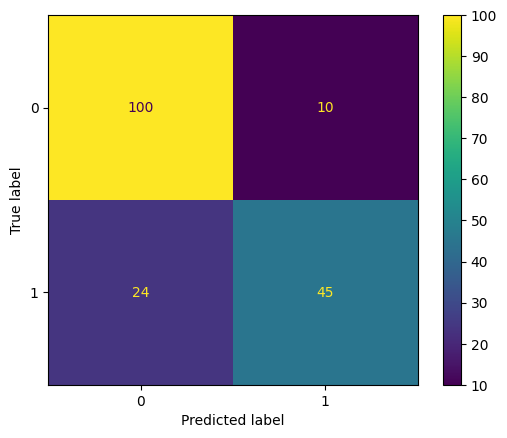

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)

## 📈 8. Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

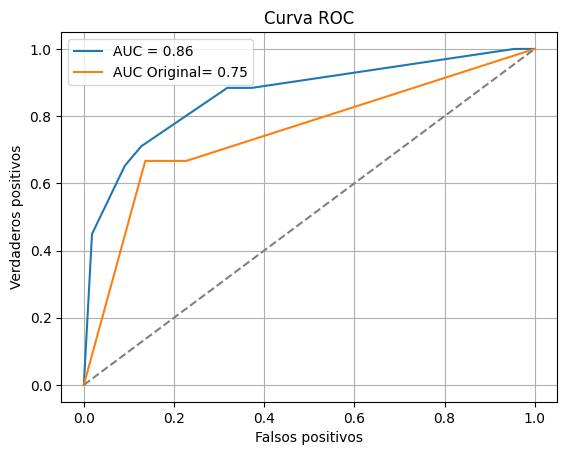

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = best_model.predict_proba(X_test)[:, 1]
y_scores_or = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
fpr_or, tpr_or, _ = roc_curve(y_test, y_scores_or)

roc_auc = auc(fpr, tpr)
roc_auc_or = auc(fpr_or, tpr_or)


plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot(fpr_or, tpr_or, label=f'AUC Original= {roc_auc_or:.2f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

## 💬 Reflexión final

### ❓ Preguntas:
- ¿Qué combinación de hiperparámetros funcionó mejor?
- ¿Cuál fue la diferencia entre el modelo base y el optimizado?
- ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

1. La mejor combinación de hiperparámetros está en la celda 6, en la línea que dice "Mejores parámetros:", donde se muestran los valores óptimos de max_depth y min_samples_split.

2. El modelo optimizado con GridSearchCV tiene mayor exactitud que el modelo base, lo que indica una mejor capacidad de predicción.


3. El AUC obtenido muestra que el modelo optimizado distingue mejor entre las clases (Survived y No Survived). Un AUC cercano a 1 indica buen rendimiento.







